In [ ]:
import numpy as np

In [ ]:
print(np.__version__)

In [ ]:
np.set_printoptions(formatter={'all': lambda x: '%.2f' % x})
print(np.random.rand(2,4))

In [ ]:
print(np.reshape(np.arange(20), (2,2,5)))

In [25]:
from sklearn.datasets import fetch_olivetti_faces

faces= fetch_olivetti_faces()
print(faces.keys())
print(faces.images.shape)


dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)


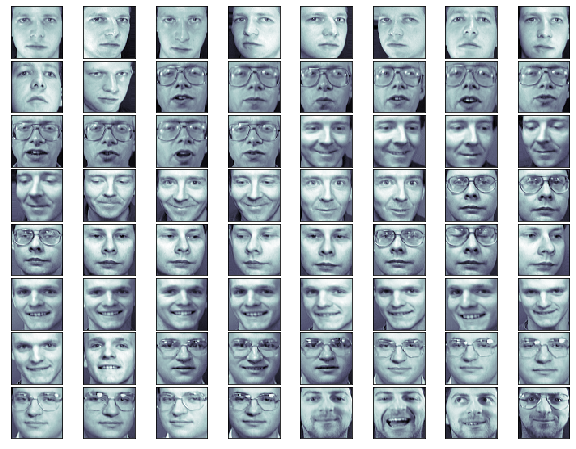

In [26]:
import matplotlib.pyplot as plt


# set up the figure
fig = plt.figure(figsize=(8, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces:
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')

In [27]:
x,y = faces.data, faces.target

print(x.shape)
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=300)

clf.fit(x,y)


(400, 4096)


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=100, max_iter=300)

In [ ]:
y_pred = clf.predict(x)

accuracy = np.mean( y_pred == y)
print("acuracy is %.2f" %accuracy)

In [61]:
import os, pickle
import numpy as np

def load_cifar10_batch(filename):
    with open(filename, 'rb') as f:
        datadict= pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        
        X = X.reshape(10000, 3, 32, 32)
        X = X.transpose(0, 2, 3, 1).astype('float')
        Y = np.array(Y)
        return X, Y

def load_cifar10(dir):
    """ Load all batches of CIFAR10 """
    # load train batch file
    xs = []
    ys = []

    for i in range(1, 6):
        filename = os.path.join(dir, 'data_batch_%d' % i)
        X, Y = load_cifar10_batch(filename)
        xs.append(X)
        ys.append(Y)

    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y

     # load test batch
    Xte, Yte = load_cifar10_batch(os.path.join(dir,'test_batch'))
    
    return Xtr, Ytr, Xte, Yte



In [70]:
X_train, y_train, X_test, y_test = load_cifar10('Downloads/cifar-10-python/cifar-10-batches-py')
print(y_train.shape,X_train.shape)

(50000,) (50000, 32, 32, 3)
(50000,) (50000, 32, 32, 3)


In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=200)


In [23]:
clf.fit(X_train.reshape(50000,3072), y_train)


ValueError: Found array with dim 4. Estimator expected <= 2.

In [19]:
y_pred = clf.predict(X_test.reshape(10000, 3072))

In [22]:
accuracy = np.mean(y_test == y_pred)
print("accuracy = %.2f" % accuracy)

accuracy = 0.10


In [43]:
import numpy as np 

np.set_printoptions(precision=2)
x= np.linspace( -3, 3, 100)
rng= np.random.RandomState(32)
y= np.sin(x) + x + rng.uniform(size=(len(x)))
# Xn = np.stack((x,y), axis=-1)
Xn = x[:, np.newaxis]
print(Xn.shape,y.shape)


(100, 1) (100,)


In [2]:
import matplotlib.pyplot as plt

In [44]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(Xn, y, random_state=10 , test_size= 0.25)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)
print(reg.coef_[0])

1.3342914809488573


In [45]:
y_pred_train = reg.predict(x_test)

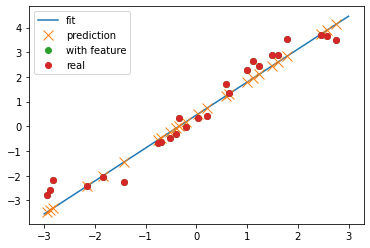

In [46]:
min_pt= Xn.min() * reg.coef_ + reg.intercept_
max_pt= Xn.max() * reg.coef_ + reg.intercept_

xx_train = np.concatenate((x_train,np.sin(x_train)),axis=1)
xx_test = np.concatenate((x_train,np.sin(x_train)),axis=1)
reg.fit(xx_train,y_train)
y_pred = reg.predict(xx_test)

plt.plot([Xn.min(),Xn.max()],[min_pt,max_pt], label='fit')
plt.plot(x_test[:,0],y_pred_train, 'x', label='prediction', markersize=10)
plt.plot(x_test,y_test, 'o', label='with feature')
plt.plot(x_test,y_test, 'o', label='real')
plt.legend(loc='best')